In [1]:
import sqlite3 as sq
import bs4 as bs
import re
import locale
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os as os
import bs4 as bs
import networkx as nx
import metaknowledge as mt
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_colwidth = 10000

# Analyse des données de publication sur le kéfir


Deux jeux de données possible : Scopus ou WOS. Dans la suite, nous privilégions WOS car il y a des catégories thématiques codées

In [10]:
RC = mt.RecordCollection("Data/wos/.")
wos = pd.DataFrame(RC.makeDict())
wos["text"] = wos.apply(lambda x : None if pd.isnull(x["AB"]) else (x["AB"]+" "+x["TI"]).lower(),axis=1)

Domaine de publication

In [3]:
d=[]
for R in RC:
    for i in R["WC"]:
        d.append((i,1,1/len(R["WC"])))
pd.DataFrame(d).groupby(0).sum().sort_values(1,ascending=False)[0:10]

,1,2
0,,
Food Science & Technology,461,336.583333
Biotechnology & Applied Microbiology,218,131.450000
Microbiology,148,94.833333
"Chemistry, Applied",96,34.583333
"Agriculture, Dairy & Animal Science",88,54.333333
Nutrition & Dietetics,69,37.666667
Biochemistry & Molecular Biology,68,26.200000
"Agriculture, Multidisciplinary",32,13.666667
"Engineering, Chemical",31,17.666667


Nationalité auteurs

In [4]:
d=[]
for R in RC:
    try:
        for i in R["C1"]:
            d.append((i.split(",")[-1].strip().replace(".",""),1,1/len(R["C1"])))
    except:
        continue
pd.DataFrame(d).groupby(0).sum().sort_values(1,ascending=False)[0:10]



,1,2
0,,
Turkey,237,110.000000
Argentina,210,73.133333
Brazil,154,57.216667
Taiwan,151,44.157143
Peoples R China,140,75.966667
Greece,108,61.833333
Poland,79,46.416667
Iran,70,28.166667
Japan,65,36.733333


Mots clés

In [5]:
d=[]
for R in RC:
    try:
        for i in R["DE"]:
            d.append((i,1))
    except:
        continue
pd.DataFrame(d).groupby(0).sum().sort_values(1,ascending=False)[0:10]


,1
0,
kefir,300
lactic acid bacteria,65
kefir grains,50
fermentation,47
probiotic,46
probiotics,45
kefiran,34
exopolysaccharide,32
fermented milk,26


### Analyse du contenu des abstracts

Définir les ontologies

In [7]:
health = ["benefits","health","efficacy","patient","therapy","treatment","cancer"]
milk = ["milk","yogurt","cream","yoghurt","butter","dairy"]
sugary = ["sugary","water kefir"]

Codage des catégories

In [11]:
def test_onto(x,onto):
    if pd.isnull(x):
        return False
    for i in onto:
        if i in x:
            return True
    return False

wos["health"] = wos["text"].apply(lambda x : test_onto(x,health))
wos["milk"] = wos["text"].apply(lambda x : test_onto(x,milk))
wos["sugary"] = wos["text"].apply(lambda x : test_onto(x,sugary))

Evolution des catégories

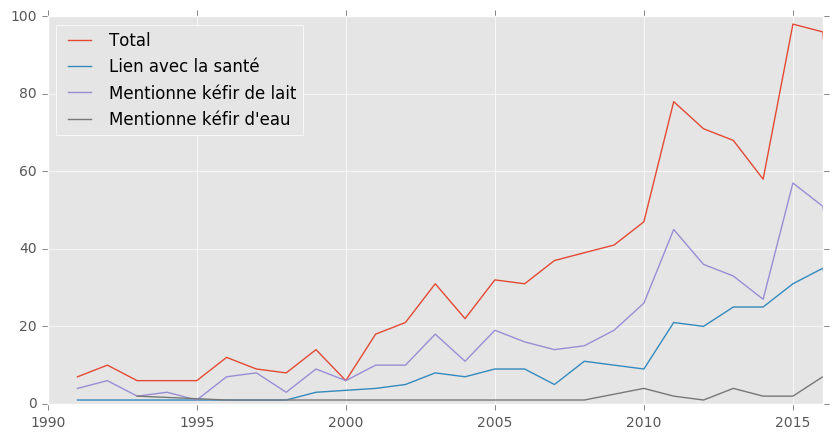

In [14]:
ax = wos[pd.notnull(wos["AB"])]["PY"].value_counts().sort_index().plot(figsize=(10,5))
wos[wos["health"]]["PY"].value_counts().sort_index().plot(ax = ax)
wos[wos["milk"]]["PY"].value_counts().sort_index().plot(ax = ax)
wos[wos["sugary"]]["PY"].value_counts().sort_index().plot(ax = ax)
plt.xlim(1990,2016)
plt.legend(["Total","Lien avec la santé","Mentionne kéfir de lait","Mentionne kéfir d'eau"],loc=2)